In [1]:
import zipfile

from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np
from PIL import ImageDraw

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')
eyes_cascade = cv.CascadeClassifier('readonly/haarcascade_eye.xml')

# the rest is up to you!

In [2]:
file2 = zipfile.ZipFile('readonly/images.zip','r')
file1 = zipfile.ZipFile('readonly/small_img.zip','r')

In [3]:
image_objects = []

In [4]:
search_string1 = 'Christopher'
search_string2 = 'Mark'

In [5]:
def searching(file,search_string):
    search_string = search_string.lower()
    for f in file.infolist():
        #if(f.filename=='a-0.png'):
        #    continue
        #display(f.filename)
        myfile=file.open(f.filename)
        im=Image.open(myfile)
        text=pytesseract.image_to_string(im.convert('L'))
        if search_string in text.lower():
            cv_img = cv.imdecode(np.frombuffer(file.read(f.filename), np.uint8), 1) 
            cv_img2=cv.cvtColor(cv_img,cv.COLOR_RGB2BGR)
            gray = cv.cvtColor(cv_img, cv.COLOR_BGR2GRAY)
            faces = face_cascade.detectMultiScale(cv_img2,scaleFactor=1.2,minNeighbors=7,minSize=(50,50),maxSize=(350,350))
            pil_img=im
            drawing=ImageDraw.Draw(pil_img)
            if(len(faces)>0):
                rec=faces.tolist()
            else:
                rec=[]
            lst = []
            for r in rec:
                cropped = pil_img.crop((r[0],r[1],r[0]+r[2],r[1]+r[3]))
                opencvImage = cv.cvtColor(np.array(cropped), cv.COLOR_RGB2BGR)
                #eyes = eyes_cascade.detectMultiScale(opencvImage)
                #if(len(eyes)>0):
                basewidth = 100
                wpercent = (basewidth/float(cropped.size[0]))
                hsize = int((float(cropped.size[1])*float(wpercent)))
                cropped = cropped.resize((basewidth,hsize), Image.ANTIALIAS)
                lst.append(cropped)
            length = len(lst)
            if (length>0):
                contact_sheet=Image.new('RGB',(400,100 if 100 > (length//4)*100 else (length//4)*100 ))
                x=0
                y=0
                print("Result found in file "+f.filename)
                for img in lst:
                    contact_sheet.paste(img, (x, y) )
                    if x+img.width == contact_sheet.width:
                        x=0
                        y=y+img.height
                    else:
                        x=x+img.width
                display(contact_sheet)
            else:
                print("Result found in file"+f.filename)
                print("But there were no faces in that file!")

Result found in file a-0.png


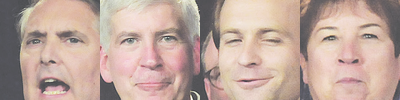

Result found in file a-1.png


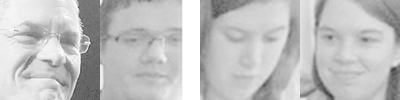

Result found in filea-10.png
But there were no faces in that file!
Result found in file a-13.png


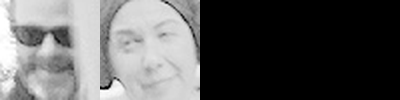

Result found in file a-2.png


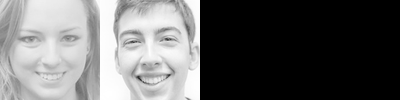

Result found in file a-3.png


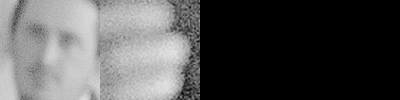

Result found in file a-5.png


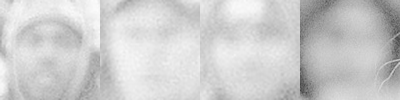

Result found in file a-8.png


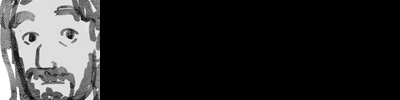

Result found in filea-9.png
But there were no faces in that file!


In [6]:
searching(file2,search_string2)